## Univariate Distributions:

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form for a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.

##### DIY: Uniform. Determine the mean, variance, skewness, peak and other features based on a given range of values for {$x_i$}.

#### 1) Gaussian Distribution:

The Gaussian distribution pdf is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.

The cumulative distribution function, cdf is the integral of pdf from $x'=-\infty$ to $x'=x$:

$$\mathrm{cdf}(x|\mu,\sigma) = \int_{-\infty}^{x} p(x'|\mu,\sigma) dx',$$

where $\mathrm{cdf}(\infty) = 1$. 

##### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is

$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$

- For $a=b=1\sigma$, we get the familar result of 68.3%.  
- For $a=b=2\sigma$ it is 95.4%.  
- For $a=b=3\sigma$ it is $99.7\%$. 

So we refer to the range $\mu \pm 1\sigma$, $\mu \pm 2\sigma$, and $\mu \pm 3\sigma$ as the 68%, 95%, and $99.7%$ **confidence limits**, respectively. Note that if your distribution is not Gaussian, then these confidence intervals will be different!

***We often still refer to uncertainty regions of distributions as $1\sigma$ or $2\sigma$ regions, which for non-Gaussian distributions usually means (for $1\sigma$) the region enclosing the $16\%$ and $84\%$ quantiles.***


[ 96.60348405  91.55756631  84.68692017 110.36828336  83.43865177
  76.41949655  92.19461953 103.6856225  101.75653349 130.24036458]
4.050588566548857e-10


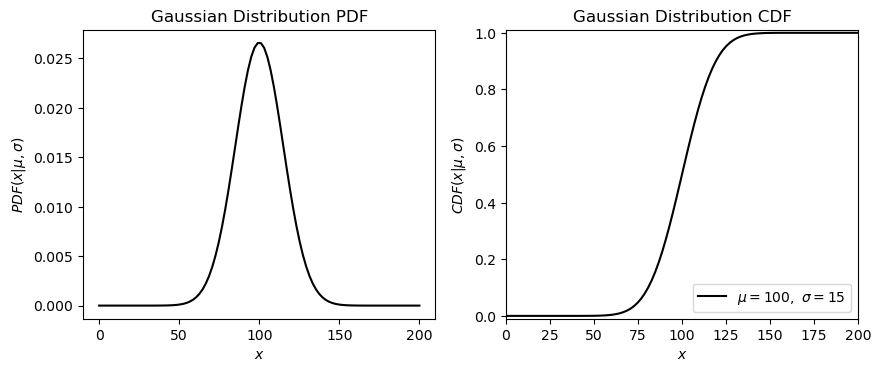

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

mu = 100
sigma = 15
distG = scipy.stats.norm(mu, sigma) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(10) # 10 random draws
p = distG.pdf(10) # pdf evaluated at x=0

print(draws)
print(p)

xgrid = np.linspace(0,200,100)
# The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
gaussPDF = distG.pdf(xgrid)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 3.75))
ax1.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
ax2.plot(xgrid, gaussCDF, ls='-', c='black', 
         label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
ax2.set_ylim(-0.01, 1.01)
ax1.set_xlabel('$x$'); ax2.set_xlabel('$x$')
ax1.set_ylabel(r'$PDF(x|\mu,\sigma)$'); ax2.set_ylabel(r'$CDF(x|\mu,\sigma)$')
ax1.set_title('Gaussian Distribution PDF'), ax2.set_title('Gaussian Distribution CDF')
plt.legend(loc=4)
plt.show()

In [3]:
# Confidence intervals from CDF:
upper = distG.cdf(mu+sigma)
lower = distG.cdf(mu-sigma)
p = upper-lower
print(p)

0.6826894921370859


In [4]:
# OTHER STATS:

#### 2) Log-Normal distribution:

If $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$, the median is $\exp(\mu)$, and the mode is $\exp(\mu-\sigma^2)$.  Try it.

In [5]:
x = scipy.stats.norm(0,1) # mean = 0, stdev = 1
y = np.exp(x.rvs(100))

print(y.mean())
print(x)

1.198264264360766


In [6]:
# Execute this cell
distLN = scipy.stats.norm(0,1) # mean = 0, stdev = 1
x = distLN.rvs(10000)
y = np.exp(x)

print(np.exp(0 + 0.5*1), y.mean())

1.6487212707001282 1.661026932417249


#### 3) $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to
$$z_i = \frac{x_i-\mu}{\sigma},$$
then the sum of squares, $Q$ 
$$Q = \sum_{i=1}^N z_i^2,$$
will follow the $\chi^2$ distribution.  The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines $\chi^2$ and is given by
$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$
where $Q>0$ and the $\Gamma$ function would denotes the gamma function, which has closed-form values for integer k.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

##### Chi-squared per degree of freedom

In practice we frequently divide $\chi^2$ by the number of degrees of freedom, and work with:

$$\chi^2_\mathrm{dof} = \frac{1}{N-1} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

which (for large $k$) is distributed as

$$ p(\chi^2_\mathrm{dof}) \sim \mathscr{N}\left(1, \sqrt{\frac{2}{N-1}}\right) $$

(where $k = N-1$, and $N$ is the number of samples). Therefore, we expect $\chi^2_\mathrm{dof}$ to be 1, to within a few $\sqrt{\frac{2}{N-1}}$.